# HILL CLIMBING - TSP

Aplicação do algoritmo Hill Climbing para solucionar
o problema do caixeiro viajante (TSP)

> Para mais informações sobre o **Algoritmo Hill-climbing**, leia o link abaixo:
>>    https://en.wikipedia.org/wiki/Hill_climbing

> Uma implementação bem simplista
>>    https://towardsdatascience.com/how-to-implement-the-hill-climbing-algorithm-in-python-1c65c29469de

---

> Para mais informações sobre o **TSP-problem (Problema do Caixeiro Viajante)**, leia os links abaixo:

>>    https://pt.wikipedia.org/wiki/Problema_do_caixeiro-viajante

>>    https://en.wikipedia.org/wiki/Travelling_salesman_problem

>    NP-Hard

>>    https://pt.wikipedia.org/wiki/NP-dif%C3%ADcil

---

## Importações

In [1]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Geração de números aleatórios
import random

In [4]:
# Geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'seaborn'

## Funções Auxiliares

### Solução Aleatória

In [ ]:
# Cria uma solucao inicial com as cidades em um ordem aleatoria

def solucao_aleatoria(tsp):
    cidades = list(tsp.keys())
    solucao = []

    # as 3 linhas abaixo não são estritamente necessarias, servem
    # apenas para fixar a primeira cidade da lista na solução
    cidade = cidades[0]
    solucao.append(cidade)
    cidades.remove(cidade)

    for _ in range(0,len(cidades)):
        #print(_, cidades, solucao)
        cidade = random.choice(cidades)

        solucao.append(cidade)
        cidades.remove(cidade)

    return solucao

In [ ]:
# Cria uma solucao inicial com as cidades em um ordem de PROXIMIDADE
# testes demonstraram que esta solução fica presa em um mínimo local

# def solucao_aleatoria(tsp):
#     cidades = list(tsp.keys())
#     solucao = []

#     # as 3 linhas abaixo não são estritamente necessarias, servem
#     # apenas para fixar a primeira cidade da lista na solução
#     cidade = cidades[0]
#     solucao.append(cidade)
#     cidades.remove(cidade)

#     for _ in range(0,len(cidades)):
#         #print(_, cidades, solucao, ">>>")

#         dist_cid = tsp.loc[cidade].items()
#         idx_val   = [(idx,val) for idx,val in dist_cid
#                         if val>0 and idx not in solucao]

#         cidade = min(idx_val, key=lambda k: k[1])[0]

#         #print(_,cidade, idx_val, list(dist_cid))

#         solucao.append(cidade)
#         cidades.remove(cidade)

#     return solucao

### Calcula Custo

In [ ]:
# Função Objetivo: calcula custo de uma dada solução.
# Obs: Neste caso do problema do caixeiro viajante (TSP problem),
# o custo é o comprimento da rota entre todas as cidades.
def calcula_custo(tsp, solucao):

    N = len(solucao)
    custo = 0

    for i in range(N):

        # Quando chegar na última cidade, será necessário
        # voltar para o início para adicionar o
        # comprimento da rota da última cidade
        # até a primeira cidade, fechando o ciclo.
        #
        # Por isso, a linha abaixo:
        k = (i+1) % N
        cidadeA = solucao[i]
        cidadeB = solucao[k]

        custo += tsp.loc[cidadeA, cidadeB]

        #print(tsp.loc[cidadeA, cidadeB], cidadeA,cidadeB)

    return custo

### Gera Vizinhos

Obs: a função `obtem_vizinhos` descrita abaixo foi gerada de forma simplificada, pois ela assume que todos os vizinhos possuem rota direta entre si. Isto tem caráter didático para simplifcar a solução. Observe que na prática isso nem sempre existe rotas diretas entre todas as cidades e, em tais casos, pode ser necessário modificar a função para corresponder a tais restrições.

In [ ]:
# A partir de uma dada solução, gera diversas variações (vizinhos)
def gera_vizinhos(solucao):

    N = len(solucao)
    for i in range(1, N):       # deixa o primeiro fixo
        for j in range(i + 1, N):
            vizinho = solucao.copy()
            vizinho[i] = solucao[j]
            vizinho[j] = solucao[i]

            yield(vizinho)


### Seleciona Melhor Vizinho

In [ ]:
def obtem_melhor_vizinho(tsp, solucao):
    melhor_custo = calcula_custo(tsp, solucao)
    melhor_vizinho = solucao

    for vizinho in gera_vizinhos(solucao):
        custo_atual = calcula_custo(tsp, vizinho)
        if custo_atual < melhor_custo:
            melhor_custo = custo_atual
            melhor_vizinho = vizinho

    return melhor_vizinho, melhor_custo


### Random-Walk - clássico

In [ ]:
def obtem_vizinho_aleatorio(tsp, solucao):

    vizinhos = list(gera_vizinhos(solucao))

    aleatorio_vizinho  = random.choice(vizinhos)
    aleatorio_custo    = calcula_custo(tsp, aleatorio_vizinho)

    return aleatorio_vizinho, aleatorio_custo


In [ ]:
def random_walk(tsp):
    solucao_inicial = solucao_aleatoria(tsp)

    atual_solucao, atual_custo = obtem_vizinho_aleatorio(tsp, solucao_inicial)

    for _ in range(30):
        atual_solucao, atual_custo = obtem_vizinho_aleatorio(tsp, atual_solucao)

    return atual_custo, atual_solucao

### Hill-Climbing - clássico

In [ ]:
# def hill_climbing(tsp):
#     solucao_inicial = solucao_aleatoria(tsp)

#     melhor_solucao, melhor_custo = obtem_melhor_vizinho(tsp, solucao_inicial)

#     while True:
#         vizinho_atual = melhor_solucao
#         custo_atual   = melhor_custo

#         melhor_solucao, melhor_custo = obtem_melhor_vizinho(tsp, vizinho_atual)
#         #print(melhor_custo)

#         if custo_atual <= melhor_custo:
#             break

#     return custo_atual, melhor_solucao

In [ ]:
def hill_climbing(tsp):

    # solucao inicial
    solucao_inicial = solucao_aleatoria(tsp)
    # melhor solucao ate o momento
    solucao_melhor, custo_melhor = obtem_melhor_vizinho(tsp, solucao_inicial)

    while True:

        # tenta obter um candidato melhor
        candidato_atual, custo_atual = obtem_melhor_vizinho(tsp, solucao_melhor)
        #print(custo_melhor, custo_atual)

        if custo_atual < custo_melhor:
            custo_melhor   = custo_atual
            solucao_melhor = candidato_atual
        else:
            break   # custo nao melhorou, entao sai do while

    return custo_melhor, solucao_melhor

In [ ]:
def hill_climbing_restart(tsp):

    for _ in range(50):

        # solucao inicial
        solucao_inicial = solucao_aleatoria(tsp)
        # melhor solucao ate o momento
        solucao_melhor, custo_melhor = obtem_melhor_vizinho(tsp, solucao_inicial)

        while True:

            # tenta obter um candidato melhor
            candidato_atual, custo_atual = obtem_melhor_vizinho(tsp, solucao_melhor)
            #print(custo_melhor, custo_atual)

            if custo_atual < custo_melhor:
                custo_melhor   = custo_atual
                solucao_melhor = candidato_atual
            else:
                break   # custo nao melhorou, entao sai do while

    return custo_melhor, solucao_melhor

### Cálculo da Matriz de Distâncias

In [ ]:
from math import sqrt

In [ ]:
# distancia Euclidiana entre dois pontos
def distancia(x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1
    return sqrt(dx**2 + dy**2)

In [ ]:
# Calcula matriz de distancias.
#
# OBS:  Não é estritamente necessario calculá-las a priori.
#       Foi feito assim apenas para fins didáticos.
#       Ao invés, as distâncias podem ser calculadas sob demanda.

def gera_matriz_distancias(Coordenadas):

    n_cidades = len(Coordenadas)
    dist = np.zeros((n_cidades,n_cidades), dtype=float)

    for i in range(0, n_cidades):
        for j in range(i+1, n_cidades):
            x1,y1 = Coordenadas.iloc[i]
            x2,y2 = Coordenadas.iloc[j]

            dist[i,j] = distancia(x1,y1,x2,y2)
            dist[j,i] = dist[i,j]

    return dist

### Gerador de Problemas Aleatórios

In [ ]:
# Gera aleatoriamente as coordenadas de N cidades.
# Obs: esta informação geralmente é fornecida como entrada do problema.

def gera_coordenadas_aleatorias(n_cidades):
    minimo = 10
    maximo = 90
    escala = (maximo-minimo)-1

    # gera n coordenadas (x,y) aleatorias entre [min, max]
    X = minimo + escala * np.random.rand(n_cidades)
    Y = minimo + escala * np.random.rand(n_cidades)
    coordenadas = {'X':X, 'Y': Y}

    cidades = ['A'+str(i) for i in range(n_cidades)]

    df_cidades = pd.DataFrame(coordenadas, index=cidades)
    df_cidades.index.name = 'CIDADE'

    return df_cidades


In [ ]:
# Recebe uma lista com as coordenadas reais de uma cidade e
# gera uma matriz de distancias entre as cidades.
# Obs: a matriz é simetrica e com diagonal nula
def gera_problema_tsp(df_cidades):
    # nomes ficticios das cidades
    cidades = df_cidades.index

    # calcula matriz de distancias
    distancias = gera_matriz_distancias(df_cidades)

    # cria estrutura para armazena as distâncias entre todas as cidades
    tsp = pd.DataFrame(distancias, columns=cidades, index=cidades)

    return tsp

### Plota Rotas

In [ ]:
# # Plota Rotas usando a biblioteca SEABORN
# def plota_rotas_sns(df_cidades, ordem_cidades):
#     # Plota a solução do roteamento das cidades
#     df_solucao = df_cidades.copy()
#     df_solucao = df_solucao.reindex(ordem_cidades)

#     sns.scatterplot(data = df_solucao, x = 'X', y = 'Y', s=50)
#     sns.lineplot(data = df_solucao, x = 'X', y = 'Y', sort=False, estimator=None)

#     # liga a última à primeira cidade para fechar o ciclo
#     sns.lineplot(data = df_solucao.iloc[[-1,0]], x = 'X', y = 'Y', sort=False)

#     n_lin = df_solucao.shape[0] # numero de linhas do df
#     X = df_solucao['X']
#     Y = df_solucao['Y']

#     # loop para adicionar anotações uma a uma
#     for i in range(0, n_lin):
#         plt.text(X.iloc[i], Y.iloc[i], df_solucao.index[i],
#                 horizontalalignment='left', size='medium',
#                 color='black', weight='semibold')

#     plt.show()

In [ ]:
# Plota a solução do roteamento das cidades
# usando a biblioteca PLOTLY
def plota_rotas(df_cidades, ordem_cidades):
    df_solucao = df_cidades.copy()
    df_solucao = df_solucao.reindex(ordem_cidades)

    X = df_solucao['X']
    Y = df_solucao['Y']
    cidades = list(df_solucao.index)

    # cria objeto gráfico
    fig = go.Figure()

    fig.update_layout(autosize=False, width=500, height=500, showlegend=False)

    # gera linhas com as rotas da primeira ate a ultima cidade
    fig.add_trace(go.Scatter(x=X, y=Y,
                             text=cidades, textposition='bottom center',
                             mode='lines+markers+text',
                             name=''))

    # acrescenta linha da última para a primeira para fechar o ciclo
    fig.add_trace(go.Scatter(x=X.iloc[[-1,0]], y=Y.iloc[[-1,0]],
                             mode='lines+markers', name=''))

    fig.show()

### Boxplots

In [ ]:
def boxplot_sorted(df, rot=90, figsize=(12,6), fontsize=20):
    df2 = df.T
    meds = df2.median().sort_values(ascending=False)
    axes = df2[meds.index].boxplot(figsize=figsize, rot=rot, fontsize=fontsize,
                                   boxprops=dict(linewidth=4, color='cornflowerblue'),
                                   whiskerprops=dict(linewidth=4, color='cornflowerblue'),
                                   medianprops=dict(linewidth=4, color='firebrick'),
                                   capprops=dict(linewidth=4, color='cornflowerblue'),
                                   flierprops=dict(marker='o', markerfacecolor='dimgray',
                                        markersize=12, markeredgecolor='black'),
                                   return_type="axes")

    axes.set_title("Cost of Algorithms", fontsize=fontsize)

## Execução

### Executa 1 vez

In [ ]:
# Simula a criação de N cidades
# com suas respectivas distâncias

n_cidades=10
df_coordenadas = gera_coordenadas_aleatorias(n_cidades)
df_coordenadas

,X,Y
CIDADE,,
A0,68.190984,44.456829
A1,49.326830,25.609760
A2,32.800902,78.450411
A3,50.648104,30.225733
A4,70.369704,81.939810
A5,11.791810,27.145030
A6,68.984075,65.391465
A7,45.347920,59.404488
A8,58.255797,57.636304


In [ ]:
tsp = gera_problema_tsp(df_coordenadas)
tsp

CIDADE,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9
CIDADE,,,,,,,,,,
A0,0.000000,26.665865,49.071595,22.589306,37.546247,58.996316,20.949653,27.299049,16.504742,25.987343
A1,26.665865,0.000000,55.364615,4.801351,60.132164,37.566405,44.373318,34.028156,33.247947,51.810302
A2,49.071595,55.364615,0.000000,51.421223,37.730502,55.440275,38.467623,22.807341,32.881282,47.308616
A3,22.589306,4.801351,51.421223,0.000000,55.346972,38.978229,39.659003,29.656225,28.446730,47.293981
A4,37.546247,60.132164,37.730502,55.346972,0.000000,80.211207,16.606255,33.673883,27.155242,16.286662
A5,58.996316,37.566405,55.440275,38.978229,80.211207,0.000000,68.802216,46.547666,55.575354,78.676361
A6,20.949653,44.373318,38.467623,39.659003,16.606255,68.802216,0.000000,24.382611,13.237766,10.343077
A7,27.299049,34.028156,22.807341,29.656225,33.673883,46.547666,24.382611,0.000000,13.028421,34.724581
A8,16.504742,33.247947,32.881282,28.446730,27.155242,55.575354,13.237766,13.028421,0.000000,23.204862


In [ ]:
solucao = ['A'+str(i) for i in range(n_cidades)]
solucao
plota_rotas(df_coordenadas, solucao)

In [ ]:
solucao = solucao_aleatoria(tsp)
print(solucao)
plota_rotas(df_coordenadas, solucao)

['A0', 'A5', 'A4', 'A6', 'A1', 'A3', 'A9', 'A7', 'A8', 'A2']


In [ ]:
# busca local da melhor solução e o seu custo
custo, solucao = hill_climbing(tsp)

print(f'{custo:7.3f}    {solucao}')

plota_rotas(df_coordenadas, solucao)

262.221    ['A0', 'A3', 'A8', 'A6', 'A9', 'A4', 'A2', 'A7', 'A5', 'A1']


In [ ]:
for _ in range(10):
    custo, solucao = hill_climbing(tsp)

    print(f'{custo:7.3f}    {solucao}')

    plota_rotas(df_coordenadas, solucao)

254.361    ['A0', 'A6', 'A8', 'A3', 'A1', 'A5', 'A7', 'A2', 'A4', 'A9']


250.460    ['A0', 'A8', 'A7', 'A2', 'A4', 'A9', 'A6', 'A5', 'A1', 'A3']


241.984    ['A0', 'A6', 'A9', 'A4', 'A2', 'A7', 'A5', 'A1', 'A3', 'A8']


265.452    ['A0', 'A9', 'A4', 'A3', 'A1', 'A5', 'A2', 'A7', 'A8', 'A6']


230.968    ['A0', 'A6', 'A9', 'A4', 'A8', 'A7', 'A2', 'A5', 'A1', 'A3']


238.323    ['A0', 'A3', 'A1', 'A5', 'A2', 'A4', 'A9', 'A6', 'A8', 'A7']


241.984    ['A0', 'A8', 'A3', 'A1', 'A5', 'A7', 'A2', 'A4', 'A9', 'A6']


250.460    ['A0', 'A8', 'A7', 'A2', 'A4', 'A9', 'A6', 'A5', 'A1', 'A3']


250.460    ['A0', 'A3', 'A1', 'A5', 'A6', 'A9', 'A4', 'A2', 'A7', 'A8']


275.184    ['A0', 'A1', 'A3', 'A6', 'A9', 'A4', 'A8', 'A7', 'A2', 'A5']


### Executa N vezes - SIMPLES

In [ ]:
# Executando várias vezes de forma simples

n_vezes = 30

for _ in range(n_vezes):

    #solucao, custo = random_walk(tsp)
    custo, solucao = hill_climbing(tsp)
    print(f'{custo:7.3f}, {solucao}')

241.984, ['A0', 'A6', 'A9', 'A4', 'A2', 'A7', 'A5', 'A1', 'A3', 'A8']
238.323, ['A0', 'A3', 'A1', 'A5', 'A2', 'A4', 'A9', 'A6', 'A8', 'A7']
241.984, ['A0', 'A8', 'A3', 'A1', 'A5', 'A7', 'A2', 'A4', 'A9', 'A6']
228.415, ['A0', 'A3', 'A1', 'A5', 'A7', 'A2', 'A4', 'A9', 'A6', 'A8']
250.460, ['A0', 'A3', 'A1', 'A5', 'A6', 'A9', 'A4', 'A2', 'A7', 'A8']
262.545, ['A0', 'A1', 'A5', 'A2', 'A4', 'A9', 'A6', 'A8', 'A7', 'A3']
241.984, ['A0', 'A6', 'A9', 'A4', 'A2', 'A7', 'A5', 'A1', 'A3', 'A8']
248.830, ['A0', 'A9', 'A4', 'A6', 'A7', 'A2', 'A5', 'A1', 'A3', 'A8']
228.351, ['A0', 'A3', 'A1', 'A5', 'A2', 'A7', 'A8', 'A6', 'A4', 'A9']
228.351, ['A0', 'A3', 'A1', 'A5', 'A2', 'A7', 'A8', 'A6', 'A4', 'A9']
275.164, ['A0', 'A5', 'A2', 'A7', 'A8', 'A6', 'A4', 'A9', 'A3', 'A1']
228.351, ['A0', 'A9', 'A4', 'A6', 'A8', 'A7', 'A2', 'A5', 'A1', 'A3']
262.221, ['A0', 'A1', 'A5', 'A7', 'A2', 'A4', 'A9', 'A6', 'A8', 'A3']
241.984, ['A0', 'A8', 'A3', 'A1', 'A5', 'A7', 'A2', 'A4', 'A9', 'A6']
248.688, ['A0', 'A9'

Observe que há uma certa variabilidade na soluções acima. Isto se deve à característica estocástica do algoritmo de solução.

---

### Executa N vezes - ESTRUTURADA com DataFrame

A seguir, é apresentada uma forma mais estruturada de se rodar várias vezes usando a estrutura de dados **`DataFrame`** para armazenar os resultados e permitir visualização de box-plots

In [ ]:
# Cria estruta de dados (DataFrame) para armazenar vários resultados
# diferentes e visualizá-los através de estatísticas

def cria_df_custos(algoritmos, n_vezes):

    nomes_algoritmos  = algoritmos.keys()

    n_lin = len(nomes_algoritmos)
    n_col = n_vezes

    df_results = pd.DataFrame(np.zeros((n_lin,n_col)),
                              index=nomes_algoritmos)
    df_results.index.name='ALGORITMO'

    return df_results

In [ ]:
# Executa N vezes para gerar estatísticas da variável custo
def executa_n_vezes(tsp, algoritmos, n_vezes):

    # Cria DataFrame para armazenar os resultados
    df_custo = cria_df_custos(algoritmos, n_vezes)

    for algoritmo, funcao_algoritmo in algoritmos.items():

        print(algoritmo)

        for i in range(n_vezes):

            custo, solucao = funcao_algoritmo(tsp)
            df_custo.loc[algoritmo,i] = custo

            print(f'{custo:10.3f}  {solucao}')

    return df_custo

In [ ]:
# Dicionario com Nomes dos modelos e suas respectivas variantes
# Tuple: (Algoritmo, Variante): funcao_algoritmo
algoritmos = {
    'Random Walk': random_walk,
    'Hill-Climbing': hill_climbing
}

#### PROBLEMA GERADO ALEATORIAMENTE

In [ ]:
###################################
# PROBLEMA GERADO ALEATORIAMENTE  #
###################################

# cria instancia do problema com n cidades

n_cidades=10
df_coordenadas = gera_coordenadas_aleatorias(n_cidades)

tsp = gera_problema_tsp(df_coordenadas)

# numero de vezes que executará cada algoritmo
n_vezes = 100

# Executa N vezes para gerar estatísticas da variável custo
df_custo = executa_n_vezes(tsp, algoritmos, n_vezes)

Random Walk
   340.328  ['A0', 'A4', 'A9', 'A7', 'A2', 'A5', 'A3', 'A8', 'A1', 'A6']
   290.708  ['A0', 'A5', 'A1', 'A9', 'A6', 'A4', 'A3', 'A8', 'A2', 'A7']
   321.292  ['A0', 'A7', 'A4', 'A6', 'A2', 'A5', 'A9', 'A8', 'A3', 'A1']
   310.530  ['A0', 'A3', 'A9', 'A6', 'A7', 'A4', 'A5', 'A8', 'A1', 'A2']
   345.650  ['A0', 'A3', 'A7', 'A4', 'A8', 'A1', 'A2', 'A5', 'A9', 'A6']
   321.467  ['A0', 'A9', 'A6', 'A7', 'A3', 'A5', 'A8', 'A2', 'A4', 'A1']
   340.972  ['A0', 'A4', 'A7', 'A6', 'A8', 'A2', 'A5', 'A9', 'A1', 'A3']
   303.324  ['A0', 'A4', 'A8', 'A3', 'A9', 'A2', 'A1', 'A7', 'A6', 'A5']
   286.369  ['A0', 'A7', 'A2', 'A9', 'A6', 'A4', 'A8', 'A5', 'A3', 'A1']
   305.170  ['A0', 'A5', 'A1', 'A8', 'A6', 'A3', 'A9', 'A4', 'A2', 'A7']
   284.252  ['A0', 'A4', 'A1', 'A2', 'A8', 'A5', 'A6', 'A3', 'A9', 'A7']
   331.039  ['A0', 'A5', 'A1', 'A8', 'A7', 'A6', 'A9', 'A3', 'A2', 'A4']
   307.618  ['A0', 'A7', 'A1', 'A2', 'A8', 'A5', 'A3', 'A6', 'A9', 'A4']
   278.392  ['A0', 'A2', 'A9', 'A8', 'A

##### Box Plots

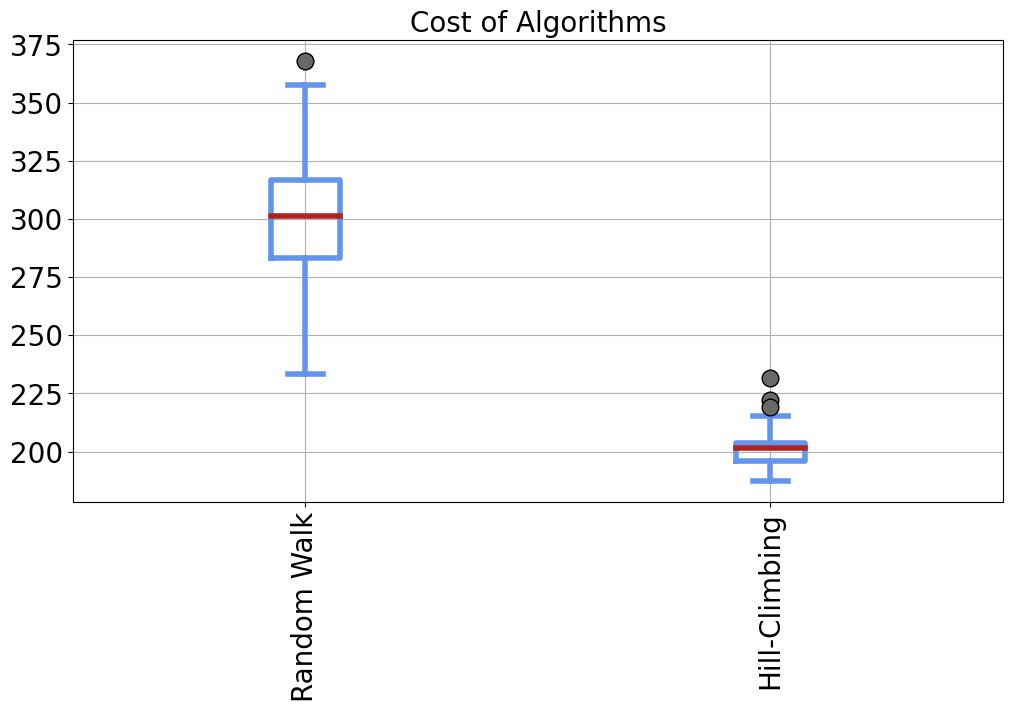

In [ ]:
boxplot_sorted(df_custo, rot=90, figsize=(12,6), fontsize=20)

Observe no gráfico acima que a variabilidade do Hill-climbing é bem menor que a do Random-Walk.

Como você justifica isso?

In [ ]:
df_custo.T.describe()

ALGORITMO,Random Walk,Hill-Climbing
count,100.000000,100.000000
mean,301.086799,201.365090
std,27.310417,8.351422
min,233.357923,187.310316
25%,283.006313,195.737046
50%,301.127180,201.589326
75%,316.493414,203.743047
max,367.848938,231.602057


---

#### PROBLEMAS REAIS

A seguir, são apresentados alguns links de problemas reais.

Basta escolher um link de **`download de dados`**, setar a variável URL abaixo, e rodar o algoritmo.



    Western Sahara
    29 cidades
    The optimal tour has length 27.603
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/wipoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/witour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/wi29.tsp

    Djibouti dataset
    38 cidades
    The optimal tour has length 6.656
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/djpoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/djtour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/dj38.tsp

    Qatar
    194 cidades
    The optimal tour has length 9.352
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/qapoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/qatour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/qa194.tsp

    Uruguay
    734 cidades
    The optimal tour has length 79.114
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/uypoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/uytour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/uy734.tsp

In [ ]:
url_coordenadas_cidade = 'https://www.math.uwaterloo.ca/tsp/world/wi29.tsp'

df_coordenadas = pd.read_table(
                    url_coordenadas_cidade,
                    skiprows=7,           # ignora as 7 primeiras linhas com informações
                    names=['X', 'Y'],     # nomes das colunas
                    sep=' ',              # separador das colunas
                    index_col=0,          # usar col=0 como index (nome das cidades)
                    skipfooter=1,         # ignora a última linha (EOF)
                    engine='python'       # para o parser usar skipfooter sem warning
              )

In [ ]:
# descomente a linha abaixo para conferir se os dados foram lidos corretamente

df_coordenadas

,X,Y
1,20833.3333,17100.0000
2,20900.0000,17066.6667
3,21300.0000,13016.6667
4,21600.0000,14150.0000
5,21600.0000,14966.6667
6,21600.0000,16500.0000
7,22183.3333,13133.3333
8,22583.3333,14300.0000
9,22683.3333,12716.6667
10,23616.6667,15866.6667


In [ ]:
tsp = gera_problema_tsp(df_coordenadas)

#solucao, custo = random_walk(tsp)
custo, solucao = hill_climbing(tsp)
print(f'{custo:7.3f}, {solucao}')
plota_rotas(df_coordenadas, solucao)

37192.267, [1, 6, 12, 20, 26, 25, 27, 24, 16, 9, 7, 8, 10, 11, 15, 19, 18, 28, 29, 23, 22, 21, 17, 14, 13, 3, 4, 5, 2]


In [ ]:
###################################
# PROBLEMA REAL #
###################################

tsp = gera_problema_tsp(df_coordenadas)

#tsp

In [ ]:
n_vezes = 30

# Executa N vezes para gerar estatísticas da variável custo
df_custo = executa_n_vezes(tsp, algoritmos, n_vezes)

Random Walk
114006.993  [1, 23, 17, 9, 25, 27, 24, 22, 7, 18, 26, 11, 20, 3, 28, 4, 21, 15, 5, 19, 14, 10, 6, 29, 16, 12, 2, 13, 8]
114265.068  [1, 15, 19, 9, 22, 13, 28, 3, 18, 6, 25, 26, 23, 20, 21, 17, 24, 8, 11, 5, 29, 12, 2, 27, 7, 4, 10, 16, 14]
118448.997  [1, 24, 3, 11, 14, 21, 16, 10, 19, 5, 23, 15, 28, 9, 13, 8, 18, 29, 4, 20, 17, 6, 12, 22, 2, 7, 27, 25, 26]
104156.070  [1, 9, 27, 26, 19, 11, 23, 8, 5, 24, 6, 2, 21, 20, 13, 28, 14, 16, 17, 10, 7, 15, 18, 29, 3, 4, 25, 22, 12]
126058.097  [1, 19, 29, 5, 12, 16, 4, 6, 10, 27, 15, 26, 2, 22, 20, 11, 25, 3, 28, 8, 24, 14, 13, 7, 18, 23, 17, 9, 21]
120798.235  [1, 27, 18, 28, 16, 26, 4, 5, 24, 8, 17, 7, 10, 19, 2, 20, 15, 9, 12, 21, 25, 11, 29, 3, 23, 13, 22, 14, 6]
113442.442  [1, 9, 7, 25, 24, 22, 4, 15, 29, 10, 3, 17, 27, 28, 11, 21, 20, 13, 19, 6, 18, 14, 2, 16, 26, 8, 12, 5, 23]
119181.356  [1, 8, 6, 28, 22, 25, 9, 23, 14, 18, 27, 13, 11, 15, 16, 12, 24, 7, 29, 4, 21, 3, 26, 5, 2, 10, 20, 19, 17]
125139.105  [1, 15, 14, 10, 

### Plota a rota da melhor solução obtida

In [ ]:
# Hill-climbing

# Melhor solucao encontrada
# 28340.563  [1, 2, 6, 5, 4, 3, 7, 9, 8, 13, 14, 16, 24, 27, 25, 20, 26, 28, 29, 23, 22, 21, 17, 18, 19, 15, 12, 10, 11]

solucao = [1, 2, 6, 5, 4, 3, 7, 9, 8, 13, 14, 16, 24, 27, 25, 20, 26, 28, 29, 23, 22, 21, 17, 18, 19, 15, 12, 10, 11]

plota_rotas(df_coordenadas, solucao)

In [ ]:
# Solucao otima
solucao = [1, 6, 10, 11, 12, 15, 19, 18, 17, 21, 22, 23, 29, 28, 26, 20, 25, 27, 24, 16, 14, 13, 9, 7, 3, 4, 8, 5, 2]

plota_rotas(df_coordenadas, solucao)

##### Box Plots

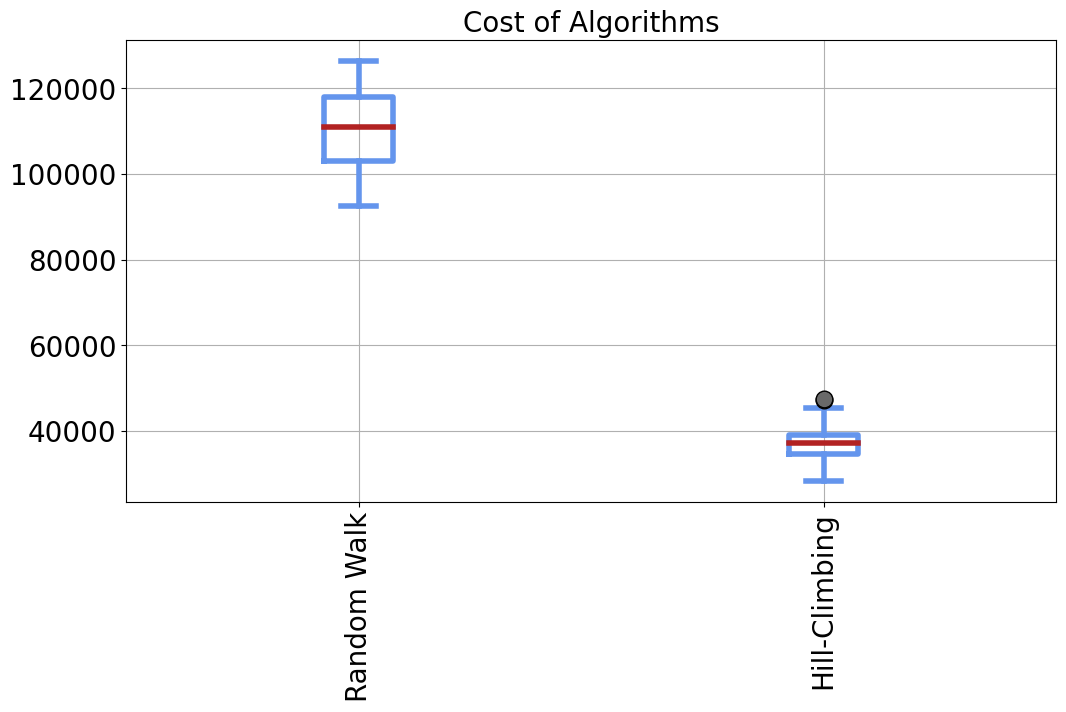

In [ ]:
boxplot_sorted(df_custo, rot=90, figsize=(12,6), fontsize=20)

In [ ]:
df_custo.T.describe()

ALGORITMO,Random Walk,Hill-Climbing
count,30.000000,30.000000
mean,110147.251587,36995.244804
std,9941.425248,4794.926685
min,92446.565567,28340.562783
25%,102963.466413,34581.119594
50%,110929.614539,37109.777875
75%,117973.970520,39064.126437
max,126365.425412,47384.153963


---

## Exercícios


1) Utilizando os códigos acima como base, implemente as variações do Hill-Climbing a seguir:

* **Stochastic hill-­climbing**

chooses at random from among the uphill moves;
the probability of selection can vary with the steepness of the uphill move.
This usually converges more slowly than steepest ascent, but in some state landscapes, it finds better solutions.


* **First­-choice hill-­climbing**

implements stochastic hill climbing by generating successors randomly until one is generated that is better than the current state. This is a good strategy when a state has many (e.g. thousands) of successors.


* **Random­-restart hill-­climbing**

is a complete version of hill-­climbing. It adopts the well­known adage, “If at first you don’t succeed, try, try again.” It
conducts a series of hill-­climbing searches from randomly generated initial states, until a goal is found. It is trivially complete with probability approaching 1, because it will eventually generate a goal state as the initial state.

Implementações das Variants do Hill-Climbing


In [ ]:
# Stochastic hill-­climbing

def hill_climbing_stochastic(tsp):
    # ponha seu código aqui


In [ ]:
# First­-choice hill-­climbing

def hill_climbing_firstchoice(tsp):
    # ponha seu código aqui


In [ ]:
# Random­-restart hill­-climbing

def hill_climbing_randomrestart(tsp):
    # ponha seu código aqui


In [ ]:
# Para rodar tudo junto:

algoritmos = {
    #'Random Walk - classic': solucao_aleatoria,
    'Hill-Climbing': hill_climbing,
    'Hill-Climbing - stochastic': hill_climbing_stochastic,
    'Hill-Climbing - first-choice': hill_climbing_firstchoice,
    'Hill-Climbing - random-restart': hill_climbing_randomrestart
    # ...
}

In [ ]:
tsp = gera_problema_tsp(df_coordenadas)

# numero de vezes que executará cada algoritmo
n_vezes = 30

# Executa N vezes para gerar estatísticas da variável custo
# DataFrame df_custo serve para armazenar todos os resultados
df_custo = executa_n_vezes(tsp, algoritmos, n_vezes)

In [ ]:
boxplot_sorted(df_custo, rot=90, figsize=(12,6), fontsize=20)

In [ ]:
df_custo.T.describe()